## NYC Airbnb Market Analysis
As a consultant working for a real estate start-up, you have collected Airbnb listing data from various sources to investigate the short-term rental market in New York. You'll analyze this data to provide insights on private rooms to the real estate company.



### Aims And Objectives

1. What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.
2. How many of the listings are private rooms? Save this into any variable.
3. What is the average listing price? Round to the nearest penny and save into a variable.
4. Combine the new variables into one DataFrame called review_dates with four columns in the following order: 
   first_reviewed, last_reviewed,    nb_private_rooms, and avg_price. The DataFrame should only contain one row of values.

### Data Gathering
Three files containing data on 2019 Airbnb listings will be used to answer these questions

### Importing the Airbnb Dataset

In [4]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


In [5]:
# Seaborn_chats function
def Seaborn_chats(Type, Dataset, x, y=None):
    """
    This function takes in the type of seaborn plot to be generated and the dataset to be used to generate the plot.
    Args:
        Type: The type of seaborn plot to be generated. It can be a barplot, scatterplot, boxplot, etc.
        Dataset: The dataset to be used to generate the plot.
        x: The x-axis of the plot.
        y: The y-axis of the plot. If not provided, only the x column will be plotted.
    Returns:
        The plot generated using the seaborn library.
    """
    sns.set(style="whitegrid")
    if Type == "barplot":
        return sns.barplot(data=Dataset, x=x, y=y)
    elif Type == "scatterplot":
        return sns.scatterplot(data=Dataset, x=x, y=y)
    elif Type == "boxplot":
        return sns.boxplot(data=Dataset, x=x, y=y)
    elif Type == "violinplot":
        return sns.violinplot(data=Dataset, x=x, y=y)
    elif Type == "stripplot":
        return sns.stripplot(data=Dataset, x=x, y=y)
    elif Type == "swarmplot":
        return sns.swarmplot(data=Dataset, x=x, y=y)
    elif Type == "countplot":
        return sns.countplot(data=Dataset, x=x)
    elif Type == "pointplot":
        return sns.pointplot(data=Dataset, x=x, y=y)
    elif Type == "lmplot":
        return sns.lmplot(data=Dataset, x=x, y=y)
    elif Type == "relplot":
        return sns.relplot(data=Dataset, x=x, y=y)
    elif Type == "catplot":
        return sns.catplot(data=Dataset, x=x, y=y)
    else:
        return "Invalid plot type"

In [6]:
def Price_dataset():
    """"
      Load the data from the file
      
    """
    data = pd.read_csv('Airbnb/airbnb_price.csv')
    return data

def Room_Type_dataset():
    # Load the data from the file
    data = pd.ExcelFile("Airbnb/airbnb_room_type.xlsx")
    roomtype = data.parse(0)
    return roomtype

def Review_dataset():
    # Load the data from the file
    data = pd.read_csv('Airbnb/airbnb_last_review.tsv', sep='\t')
    return data

In [7]:
# Remove White space an string characters
def replace_values_in_column(dataframe, column_name, string_to_replace, replace_with) -> pd.DataFrame:
    """
    This function Removes specific string characters from a column in a dataframe.

    Args:
            dataframe: The dataframe to be cleaned. Ensure that the dataframe has been imported before calling this function.

            column_name : The name of the column to be cleaned.
            
            string_to_replace : The string characters to be replaced in the column.

            replace_with : The string to replace the string characters with.

    Returns:
        The dataframe with the replaced values in the specified column.
    """
    dataframe[column_name] = dataframe[column_name].str.replace(string_to_replace, replace_with)
    return dataframe

# Now you can specify the string to replace when calling the function
Price = replace_values_in_column(Price_dataset(), 'price', ' dollars', '')

# Convert the price column to numeric
Price['price'] = pd.to_numeric(Price['price'])
print(Price["price"].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


# Merging The 3 Dataset
The most efficient way to answer this question is by combining the three DataFrames into a single DataFrame.

In [8]:
def New_York_Airbnb_dataset() -> pd.DataFrame:
    """
    This function merges the three datasets together to form a single dataset.
    args:
        None
    Returns:
        The merged dataset.
    """
    Price_Room = pd.merge(Price, Room_Type_dataset(), on='listing_id', how='inner')
    New_York_Airbnb = pd.merge(Price_Room, Review_dataset(), on='listing_id', how='inner')
    return New_York_Airbnb
New_York_Airbnb_dataset()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019
...,...,...,...,...,...,...,...
25204,36425863,129,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM,Rusaa,July 07 2019
25205,36427429,45,"Queens, Flushing",No.2 with queen size bed,PRIVATE ROOM,H Ai,July 07 2019
25206,36438336,235,"Staten Island, Great Kills",Seas The Moment,Private room,Ben,July 07 2019
25207,36442252,100,"Bronx, Mott Haven",1B-1B apartment near by Metro,Entire home/apt,Blaine,July 07 2019


# Question 1

What are the dates of the earliest and most recent reviews? Store these values as two separate variables

In [9]:
def to_datetime(Datasetname, columnname): 
    """
    This function converts the last_review column to datetime.
    Args:
        Datasetname: The name of the dataset to be used. Ensure that the dataset has been imported before calling this function.
        columnname: The name of the column to be converted to datetime.
    Returns:
        The New_York_Airbnb dataset with the last_review column converted to datetime.
    """
    Datasetname[columnname] = pd.to_datetime(Datasetname[columnname])
    return Datasetname

New_York_Airbnb = to_datetime(New_York_Airbnb_dataset(), 'last_review')
New_York_Airbnb.head().dtypes

# find the earliest and most recent review dates

def earliest_and_most_recent_review(Datasetname):
    """
    This function calculates the earliest and most recent review dates.
    Args:
        Datasetname: The name of the dataset to be used. Ensure that the dataset has been imported before calling this function.
    Returns:
        The earliest and most recent review dates.
    """
    earliestdate = Datasetname['last_review'].min()
    mostrecentdate = Datasetname['last_review'].max()
    return earliestdate, mostrecentdate
earliest_and_most_recent_review(New_York_Airbnb)


(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-07-09 00:00:00'))

# Question 2
How many of the listings are private rooms? Save this into any variable

In [10]:
def private_count() -> int:
    """
    This function counts the number of private rooms in the dataset.
    Args:
        dataset: The dataset to be used. Ensure that the dataset has been imported before calling this function.
    Returns:
        The number of private rooms in the dataset.
    """
    Private_room = New_York_Airbnb[New_York_Airbnb['room_type'] == 'private room']
    private_count = len(Private_room)
    return private_count

Count = private_count()
print('Total private room count:', Count)


Total private room count: 2248


# Question 3
What is the average listing price? Round to the nearest penny and save into a variable.

In [15]:
def toflaot(Datasetname, columnname): 
    """
    This function converts the price column to float.
    Args:
        Datasetname: The name of the dataset to be used. Ensure that the dataset has been imported before calling this function.
        columnname: The name of the column to be converted to float.
    Returns:
        The New_York_Airbnb dataset with the price column converted to float.
    """
    New_York_Airbnb[columnname] = New_York_Airbnb[columnname].astype(float)
    return Datasetname
New_York_Airbnb = toflaot(New_York_Airbnb, 'price')

# Calculate the average price of a private room in New York

def average_price(dataset):
    """
    This function calculates the average price of a private room in New York.
    Args:
        dataset: The dataset to be used. Ensure that the dataset has been imported before calling this function.
    Returns:
        The average price of a private room in New York.
    """
    average_price = dataset['price'].mean()
    return average_price
average_price(New_York_Airbnb)

141.7779364512674

# Question 4
Combine the new variables into one DataFrame called review_dates with four columns in the following order: first_reviewed, last_reviewed, nb_private_rooms, and avg_price. The DataFrame should only contain one row of values.

In [19]:
# Add Answers to one dataframe
Review_Dates = pd.DataFrame({'Earliest Review Date': [earliest_and_most_recent_review(New_York_Airbnb)[0]], 'Most Recent Review Date': [earliest_and_most_recent_review(New_York_Airbnb)[1]], 
                             'Number of private_rooms': [private_count()], 'Averageprice': [average_price(New_York_Airbnb)]})
Review_Dates.head()

,Earliest Review Date,Most Recent Review Date,Number of private_rooms,Averageprice
0,2019-01-01,2019-07-09,2248,141.777936


# Detecting any outliers


In [11]:
#Profile = ProfileReport(Price, title="Pandas Profiling Report")
#display(Profile)


## Outliers
**Outliers** are data points that are far from the other observations in a dataset. They can occur naturally due to variability or can be caused by issues like human error, faulty equipment, or poor sampling. Outliers can significantly affect statistical analysis and machine learning since they can skew hypothesis tests and calculations like mean and standard deviation.

To fix outliers, different techniques can be used, but in this example, we will use the **interquartile range (IQR) method**. The IQR method involves identifying the outliers as those data points that fall below Q1–1.5 IQR or above Q3 + 1.5 IQR. Q1 represents the 25th percentile, Q3 represents the 75th percentile, and IQR represents the interquartile range calculated by Q3 minus Q1. We can easily create a function in Python using the convenient pandas .quantile() function that takes in our column from the dataframe and outputs the outliers.

c:\Users\eobay\OneDrive\Desktop\Portfolio\Hire me\Git Upload\NYC-Airbnb-Market-\.conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price'>

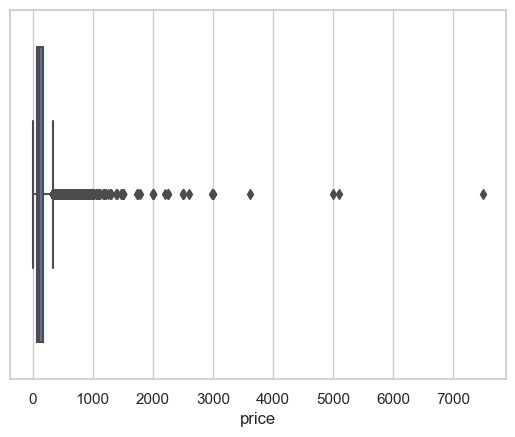

In [6]:
Seaborn_chats("boxplot", Price, "price")